In [1]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

In [4]:
LR = LogisticRegression()
opt = GradientDescentOptimizer()
loss_arr = []
for _ in range(100):
    # add other stuff to e.g. keep track of the loss over time.
    loss = opt.loss(X, y)
    loss_arr.append(loss)
    opt.step(X, y, alpha = 0.1, beta = 0.9)

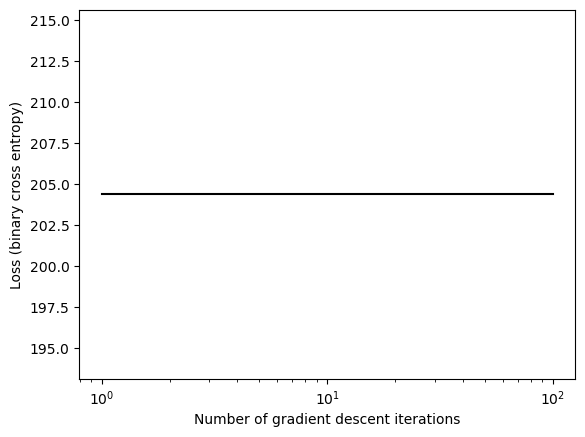

In [5]:
plt.plot(torch.arange(1, len(loss_arr)+1), loss_arr, color = "black")
plt.semilogx()
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")